# Data Preparation – Explorative Datenqualitätsanalyse (ohne Eingriffe)

Ziel: Überblick über Datenqualität gewinnen, **ohne** die Daten zu verändern.
Checks:
- Struktur & Datentypen
- Missing Values (pro Spalte/Zeile)
- Duplikate
- Ausreißer (IQR & z-Score)
- (In)konsistente Kategorien (z. B. Groß/Kleinschreibung, Leerzeichen, Akzente)
- Konstanten/Quasi-Konstanten
- (Optional) Zielvariable / Klassenverteilung

> Hinweis: Dieses Notebook **nimmt keine Bereinigung** vor – nur Analyse/

es gibt keine null zu ersetzen oder keine ausreiser zu ersetzen ausser amount nochmals prüfen
featureengineering sehr wichtig
nochmals prüfen ob es normalverteilungen gibt
skalieren der zahlenwerte.

In [2]:
### Daten einlesen - VORSICHT: Absichtlich "manipulierte" Daten
## Daten von Kaggle: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# CSV-File einlesen - mit Library pandas
import pandas as pd
df = pd.read_csv('../../../data/Big_Black_Money_Dataset.csv')

In [3]:
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

In [5]:
df.shape

(10000, 14)

In [6]:
# Das Feature "Country" auf Konsistenz prüfen
df['Country'].unique()

array(['Brazil', 'China', 'UK', 'UAE', 'South Africa', 'Russia',
       'Switzerland', 'India', 'USA', 'Singapore'], dtype=object)

In [4]:
# Das Feature "Transaction Type" auf Konsistenz prüfen
df['Transaction Type'].unique()

array(['Offshore Transfer', 'Stocks Transfer', 'Cash Withdrawal',
       'Cryptocurrency', 'Property Purchase'], dtype=object)

In [5]:
df['Industry'].unique()

array(['Construction', 'Luxury Goods', 'Oil & Gas', 'Real Estate',
       'Arms Trade', 'Casinos', 'Finance'], dtype=object)

In [6]:
df['Destination Country'].unique()

array(['USA', 'South Africa', 'Switzerland', 'Russia', 'Brazil', 'UK',
       'India', 'China', 'Singapore', 'UAE'], dtype=object)

In [9]:
df['Source of Money'].unique()


array(['Illegal', 'Legal'], dtype=object)

In [36]:
df['Transaction Type'].unique()

array(['Offshore Transfer', 'Stocks Transfer', 'Cash Withdrawal',
       'Cryptocurrency', 'Property Purchase'], dtype=object)

In [14]:
df[df.duplicated()].head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country


In [4]:
# Prüfen, ob irgendwo Daten fehlen
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       5
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
# Das Feature "CreditScore" auf Ausreisser prüfen
Q1 = df["Amount (USD)"].quantile(0.25)
Q3 = df["Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Amount (USD)"] < lower_bound) | (df["Amount (USD)"] > upper_bound)]
print(Q1)
print(Q3)
print(IQR)
print(outliers["Amount (USD)"])


1279005.2835407348
3722416.45327961
2443411.169738875
Series([], Name: Amount (USD), dtype: float64)


In [8]:
# in der Spalte "CreditScore" die Zeilen entfernen, die ein Ausreisser sind
df = df[(df["CreditScore"] >= lower_bound) & (df["CreditScore"] <= upper_bound)]

In [15]:
# Beispiel: Spalte "Country" prüfen (ersetze mit deinem Spaltennamen)
col = "Country"

print("Anzahl unterschiedlicher Werte:", df[col].nunique())
print("Top 10 häufigste Werte:")
print(df[col].value_counts().head(10))

# mögliche Tippfehler / Varianten sichtbar machen
print("\nAlle Werte (sortiert):")
print(sorted(df[col].dropna().unique())[:50])  # nur die ersten 50 anzeigen


Anzahl unterschiedlicher Werte: 10
Top 10 häufigste Werte:
Country
China           1038
South Africa    1026
UK              1014
Brazil          1006
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              976
USA              973
Name: count, dtype: int64

Alle Werte (sortiert):
['Brazil', 'China', 'India', 'Russia', 'Singapore', 'South Africa', 'Switzerland', 'UAE', 'UK', 'USA']


In [17]:
# Beispiel: Spalte "Amount" prüfen (ersetze mit deinem Spaltennamen)
col = "Amount (USD)"

print(df[col].describe())   # zeigt min, max, Mittelwert, Quartile

# einfache Regel: Werte größer als Q3 + 1.5*IQR oder kleiner als Q1 - 1.5*IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Anzahl Ausreißer:", len(outliers))
outliers.head()


count    1.000000e+04
mean     2.501818e+06
std      1.424364e+06
min      1.003180e+04
25%      1.279005e+06
50%      2.501310e+06
75%      3.722416e+06
max      4.999812e+06
Name: Amount (USD), dtype: float64
Anzahl Ausreißer: 0


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country


## Feature Engineering: Neue Ratios erstellen

Erstelle zwei neue Features als Verhältnisse (Ratios):
1. **Amount / Balance**: Transaktion im Verhältnis zum Kontoguthaben
2. **Debt / Income**: Schuldenquote im Verhältnis zum Einkommen

In [33]:
df.groupby("Industry")["Amount (USD)"].transform("mean")

0       2.538177e+06
1       2.465999e+06
2       2.538177e+06
3       2.466224e+06
4       2.478126e+06
            ...     
9995    2.478126e+06
9996    2.465999e+06
9997    2.466224e+06
9998    2.478126e+06
9999    2.546362e+06
Name: Amount (USD), Length: 10000, dtype: float64

array([[<Axes: title={'center': 'Amount (USD)'}>,
        <Axes: title={'center': 'Money Laundering Risk Score'}>],
       [<Axes: title={'center': 'Shell Companies Involved'}>, <Axes: >]],
      dtype=object)

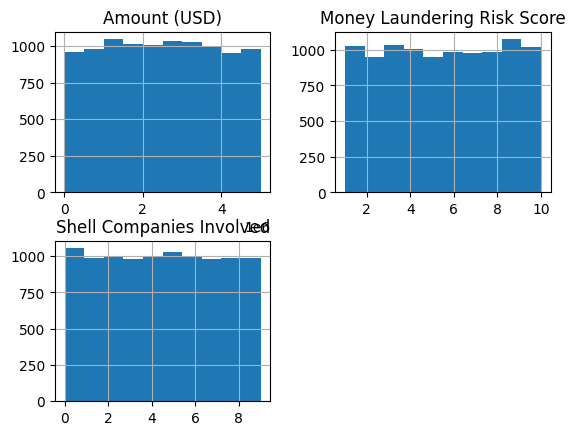

In [38]:
df.hist()

In [39]:
df = pd.get_dummies(df, columns=['Transaction Type'])

In [40]:
df.head()

,Transaction ID,Country,Amount (USD),Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Type_Cash Withdrawal,Transaction Type_Cryptocurrency,Transaction Type_Offshore Transfer,Transaction Type_Property Purchase,Transaction Type_Stocks Transfer
0,TX0000000001,Brazil,3.267530e+06,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore,False,False,True,False,False
1,TX0000000002,China,4.965767e+06,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas,False,False,False,False,True
2,TX0000000003,UK,9.416750e+04,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland,False,False,False,False,True
3,TX0000000004,UAE,3.864201e+05,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama,True,False,False,False,False
4,TX0000000005,South Africa,6.433784e+05,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg,False,True,False,False,False


## Dateninkosistenz
eventuell Country setzen
date of transaction in datetime verwandeln


Featureengineering:
Country noch nach Kontinent oder nach BIP klassifizieren
inlands und auslangstransaktionen
source of money noch aufteilen in bool
nummern mit skalen angleichen -> es ist nicht normalverteilt deshalb skalen dings bums
one hot encoding anwenden für industry